# seoul_dermatology
- 서울시 피부과 위치 구별 분석
- 공공데이터포털의 `소상공인시장진흥공단_상가업소정보_의료기관_201909.csv` 이용

## 환경 설정 및 데이터셋 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [4]:
df = pd.read_csv("Data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
df.shape

(91335, 39)

## 결측치 처리

In [5]:
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

In [6]:
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [7]:
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [8]:
df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [9]:
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [10]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


## seoul_dermatology DataFrame 생성

In [19]:
df_seoul_dermatology = df[(df["상권업종소분류명"] == "피부과") & (df["시도명"] == "서울특별시")].copy()
df_seoul_dermatology

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
274,22472541,바롬선릉의원,S,의료,S01,병원,S01B16,피부과,서울특별시,11680.0,...,서울특별시 강남구 대치동 897-28,116804166751,서울특별시 강남구 테헤란로64길,24,1168010600108970028012595,서울특별시 강남구 테헤란로64길 24,135280.0,6198.0,127.051430,37.503325
278,22410723,예피부과의원,S,의료,S01,병원,S01B16,피부과,서울특별시,11410.0,...,서울특별시 서대문구 홍제동 253-3,114103000008,서울특별시 서대문구 통일로,440,1141011100102530003000017,서울특별시 서대문구 통일로 440,120090.0,3629.0,126.945072,37.588346
313,25290308,예지원피부과,S,의료,S01,병원,S01B16,피부과,서울특별시,11650.0,...,서울특별시 서초구 반포동 18-3,116502121003,서울특별시 서초구 반포대로,287,1165010700100180003000001,서울특별시 서초구 반포대로 287,137040.0,6547.0,127.001042,37.504342
329,20028847,드림피부과,S,의료,S01,병원,S01B16,피부과,서울특별시,11680.0,...,서울특별시 강남구 신사동 583,116803121022,서울특별시 강남구 논현로,843,1168010700105830000010367,서울특별시 강남구 논현로 843,135892.0,6031.0,127.027949,37.524381
404,20706128,연세에스병원피부과,S,의료,S01,병원,S01B16,피부과,서울특별시,11680.0,...,서울특별시 강남구 논현동 122-1,116803122011,서울특별시 강남구 학동로,110,1168010800101220000007688,서울특별시 강남구 학동로 110,135010.0,6110.0,127.023039,37.511356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90412,16243603,피부과더하얀,S,의료,S01,병원,S01B16,피부과,서울특별시,11110.0,...,서울특별시 종로구 세종로 202-1,111102005001,서울특별시 종로구 세종대로,159,1111011900102020001028380,서울특별시 종로구 세종대로 159,110822.0,3183.0,126.976329,37.570592
90458,16200731,연세밝은피부과,S,의료,S01,병원,S01B16,피부과,서울특별시,11710.0,...,서울특별시 송파구 신천동 17-4,117104169538,서울특별시 송파구 올림픽로37길,130,1171010200100170004000001,서울특별시 송파구 올림픽로37길 130,138933.0,5507.0,127.104481,37.520769
90480,16236651,비앤씨피부과의원,S,의료,S01,병원,S01B16,피부과,서울특별시,11440.0,...,서울특별시 마포구 신공덕동 14-16,114404139196,서울특별시 마포구 만리재옛길,12,1144010300100140016002782,서울특별시 마포구 만리재옛길 12-6,121800.0,4209.0,126.954983,37.545139
91112,16366507,오가나피부과의원,S,의료,S01,병원,S01B16,피부과,서울특별시,11680.0,...,서울특별시 강남구 청담동 3,116802122001,서울특별시 강남구 도산대로,420,1168010400100030000000001,서울특별시 강남구 도산대로 420,135948.0,6062.0,127.042042,37.522865


In [21]:
df_seoul_dermatology["시군구명"].value_counts()

강남구     159
서초구      73
송파구      18
광진구      16
마포구      15
강서구      15
강동구      15
성북구      14
은평구      13
영등포구     13
양천구      12
중구       12
동대문구     11
서대문구     10
노원구       9
동작구       9
관악구       8
용산구       7
중랑구       6
구로구       5
성동구       3
종로구       3
도봉구       2
금천구       1
강북구       1
Name: 시군구명, dtype: int64

In [22]:
df_seoul_dermatology.loc[~df_seoul_dermatology["상호명"].str.contains("피부과"), "상호명"].unique()

array(['바롬선릉의원', '연세H&S클리닉', '미클리닉', '김성호', '오체안피부', '원의원', '강남비엠에스',
       '라엘르의원', '유은정좋은의원', '리치미클리닉', '리엔뉴클리닉', '노룬산', 'Dr윤뷰티플클리닉',
       '4ever피부성형외과', '김영주피부관리실', '클리닉엠', '클린압ㅍ부괴', '엔비클리닉', 'C&C피부비뇨기과',
       '남기웅비뇨과피부부과', '원크리닉', 'BLS크리닉', '비엔유클리닉', '스칼프데이탈모,두피관리', 'BLS클리닉',
       '항노화도만연구소', '해바라기의원', '모더블랙탈모모발이식센터', '모제림모발이식센타', '비만,레이저클리닉',
       '리더스피부', '명진피부', '미앤미', '좋은세상의원', '강남연세모발이식센터', '유중하레이저크리닉',
       '닥터에버리스', '나이스모', '메디힐의원', '연세아르떼', '바로의원클리닉', '활기찬아침의원', '자스민',
       '연세라인업의원', '라르떼', '연세지움', '리즈의원', '피부사랑', '연세모발식센터', '티엔의원',
       '예지미의원', '아이러브모발이식센터', '클리닉의원', '뉴센스의원', '이코스메틱', '예사랑향장',
       '청담고운세상코스메틱', '한국산업의학연구소디에', '강남비엘에스의원', '닥터포유의원', '비앤씨코스메틱',
       '소프터치', '연세라마르의원', '연세아름다운코스메틱', '코사랑의원', '라마르의원명동점', '포이즌클리닉',
       '아름라인의원', '임스메디의원', 'OST의원', '라마르의원이수점', '청담엔비의원', '노블클래식의원당산점',
       '마시멜로의원', '미소사랑의원', '서울ND의원', '라르떼의원', '엘스피부,성형', '화이트데이의원',
       '목동미앤정의원', '고려프라임의원', '청아의원', '고운미의원', '이너뷰의원', '클리어의원', '연세라헨느의원',
       '닥터미소의원

In [28]:
drop_row = df_seoul_dermatology[df_seoul_dermatology["상호명"].str.contains("탈모|모발이식|코스메틱|비뇨")].index
drop_row = drop_row.tolist()
drop_row

[1854,
 7333,
 7430,
 9494,
 13270,
 14349,
 15913,
 27210,
 32376,
 32610,
 34236,
 35106,
 55796]

In [31]:
print(df_seoul_dermatology.shape)
df_seoul_dermatology = df_seoul_dermatology.drop(drop_row, axis=0)
print(df_seoul_dermatology.shape)

(450, 29)
(437, 29)


## 서울시 구별 피부과 그래프

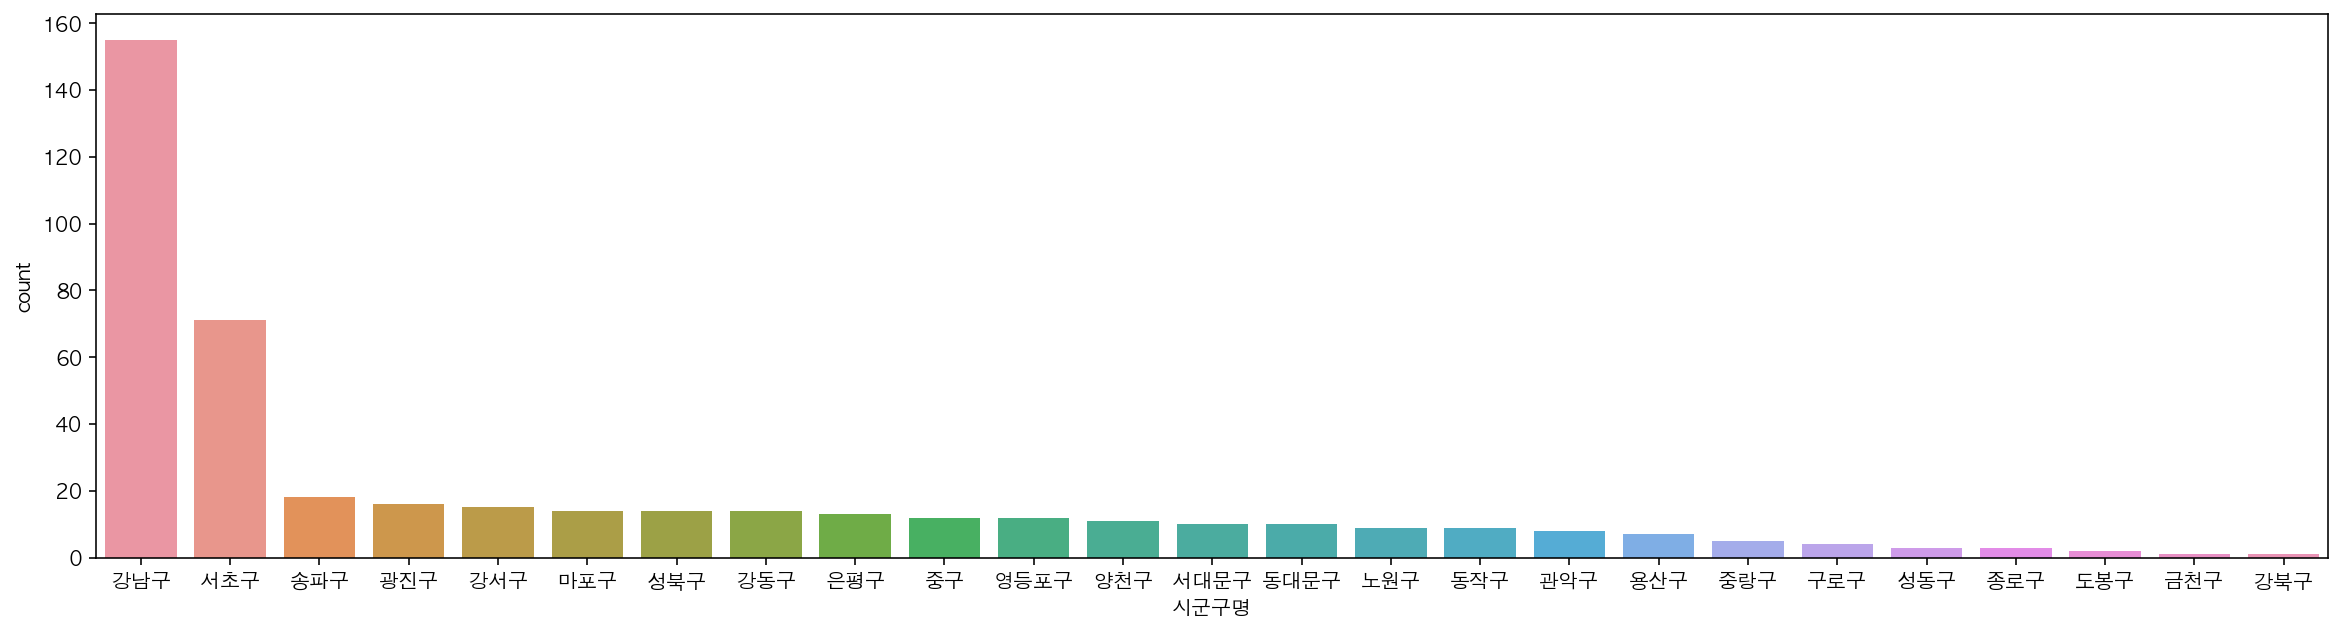

In [33]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df_seoul_dermatology, x="시군구명", order=df_seoul_dermatology["시군구명"].value_counts().index)

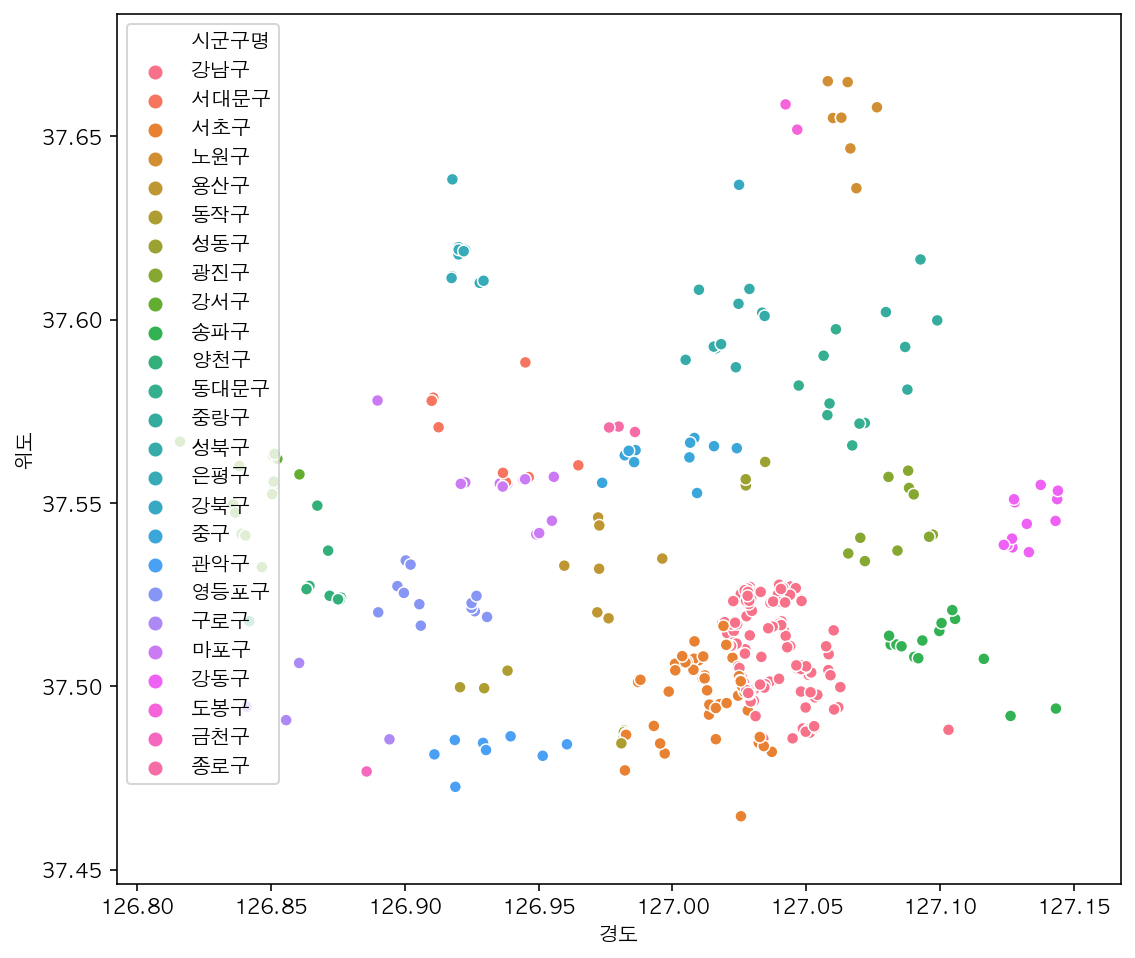

In [34]:
plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul_dermatology, x="경도", y="위도", hue="시군구명")

## 서울시 피부과 지도

In [38]:
import folium

map = folium.Map(location=[df_seoul_dermatology["위도"].mean(), df_seoul_dermatology["경도"].mean()], zoom_start=12)

for n in df_seoul_dermatology.index:
    name = df_seoul_dermatology.loc[n, "상호명"]
    address = df_seoul_dermatology.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_seoul_dermatology.loc[n, "위도"], df_seoul_dermatology.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map

## 결론
타 지역에 비해 강남 및 서초, 특히 강남구에 월등히 많은 피부과가 위치하고 있음을 알 수 있다. 